In [1]:
#%matplotlib notebook
%matplotlib inline

import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

import gsw
from neutral_surfaces import pot_dens_surf
#from neutral_surfaces._densjmd95 import rho_ufunc

In [8]:
OCCA_dir = "~/work/data/OCCA/"
xrs = xr.open_dataset(OCCA_dir + "DDsalt.0406annclim.nc")
xrt = xr.open_dataset(OCCA_dir + "DDtheta.0406annclim.nc")
lon = xrs.Longitude_t.values
lat = xrs.Latitude_t.values
S = np.require(xrs.salt.values[0] , dtype=np.float64, requirements="C")  # pick first time
T = np.require(xrt.theta.values[0], dtype=np.float64, requirements="C")  # pick first time
Z = np.require(xrs.Depth_c, dtype=np.float64, requirements="C")     # DEV: currently ignoring distinction between Z and P, until Boussinesq equation of state is ready. 
S = np.moveaxis(S, 0, -1) # Move vertical axis to end
T = np.moveaxis(T, 0, -1) # Move vertical axis to end

In [12]:
# Here we discard the unneeded time axis.
%time s, t, p = pot_dens_surf(S, T, Z, 0., 1026., axis=-1, tol=1e-4)
# 202 ms ± 3.63 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)  when not overwriting p in vertsolve
# 202 ms ± 1.4 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)   when overwriting p in vertsolve

CPU times: user 186 ms, sys: 16 ms, total: 202 ms
Wall time: 199 ms


Text(0.5, 1.0, 'Depth of $\\sigma_\\theta = 26$ in OCCA')

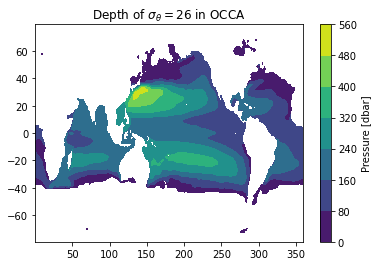

In [13]:
fig, ax = plt.subplots()
cs = ax.contourf(lon, lat, p)
cbar = fig.colorbar(cs, ax=ax)
cbar.set_label("Pressure [dbar]")
ax.set_title(r"Depth of $\sigma_\theta = 26$ in OCCA")

In [6]:
# %%timeit
# s, t, p = pot_dens_surf(xrst.salt.values, 
#                         xrst.theta.values, 
#                         xrst.p.values, 
#                         0., 1026., axis=1, tol=1e-4)